<a href="https://colab.research.google.com/github/falahamro/Social-Network-Analysis/blob/main/Group_Centrality_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# Group Closeness

In [4]:
closeness = pd.read_csv("/content/drive/MyDrive/Social Network Analysis_Freedom Convoy/Final Query/Final_final query/Group Centrality Measures/Group Closeness (1) (2).csv")

In [5]:
closeness

,Phase,User,Degree,Weighted Degree,Eccentricity,Closnesscentrality,Harmonicclosnesscentrality,Betweenesscentrality,Authority,Pageranks,Modularity_class,Eigencentrality
0,pre,Milhouse_Van_Ho,895,895,7,0.315120,0.390023,5.871673e+06,0.634538,0.043735,15,1.000000
1,pre,BernieSpofforth,2,2,2,0.750000,0.833333,2.000000e+00,0.000000,0.000172,38,0.000662
2,pre,BJdichter,1,1,10,0.175672,0.182596,0.000000e+00,0.000006,0.000068,4,0.000942
3,pre,CarymaRules,8,10,9,0.165136,0.175579,3.503650e+03,0.000001,0.000167,17,0.003266
4,pre,JoJoSweet_Love,2,2,9,0.208107,0.221960,2.861279e+02,0.000807,0.000089,37,0.002143
5,during,BernieSpofforth,8198,9500,8,0.356384,0.430352,3.751474e+08,0.410488,0.046480,48,1.000000
6,during,CarymaRules,2475,5046,8,0.325592,0.356993,1.418470e+08,0.011258,0.013426,47,0.231452
7,during,BJdichter,462,586,9,0.306260,0.322899,1.365586e+07,0.014202,0.001833,73,0.052491
8,during,JoJoSweet_Love,14,20,9,0.260673,0.271281,4.175910e+05,0.000415,0.000062,50,0.002714
9,post,Milhouse_Van_Ho,6220,9069,9,0.344389,0.404693,2.433928e+08,0.255044,0.026848,526,0.755329


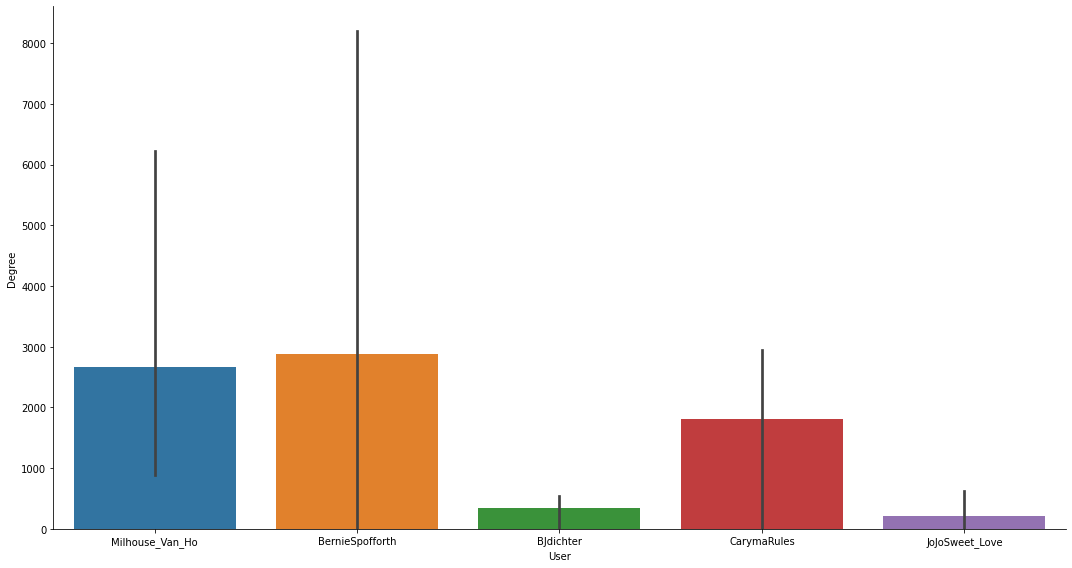

In [6]:
sns.catplot(data=closeness, x="User", y="Degree", kind="bar", height=8, aspect=15/8)
plt.show()

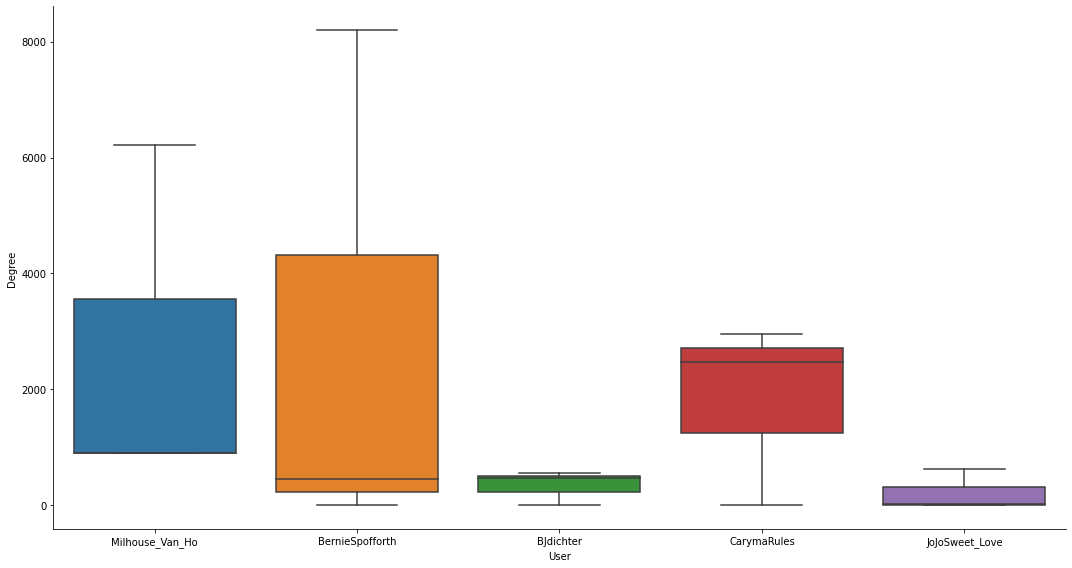

In [7]:
sns.catplot(data=closeness, x="User", y="Degree", kind='box', height=8, aspect=15/8)
plt.show()


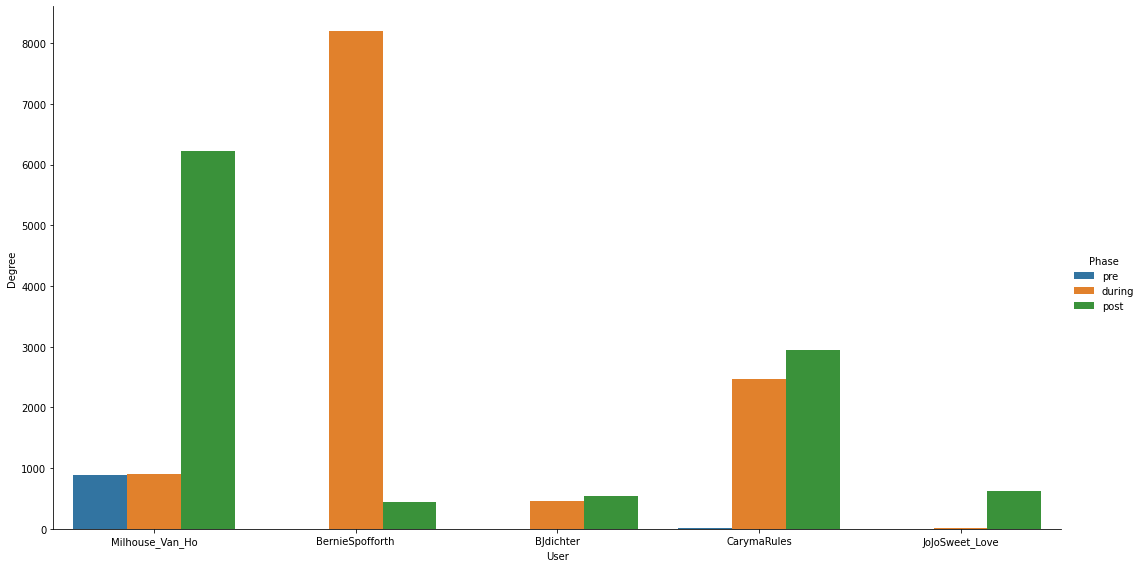

In [8]:
sns.catplot(data=closeness, x="User" ,y="Degree", kind='bar',hue="Phase", height=8, aspect=15/8)
plt.show()

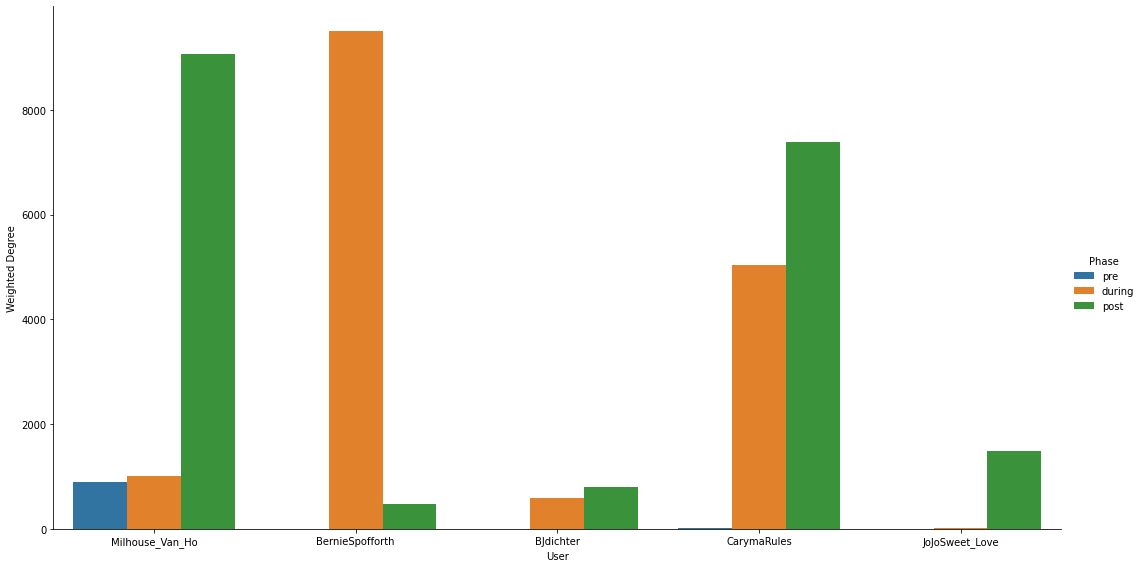

In [9]:
sns.catplot(data=closeness, x="User" ,y="Weighted Degree", kind='bar',hue="Phase", height=8, aspect=15/8)
plt.show()

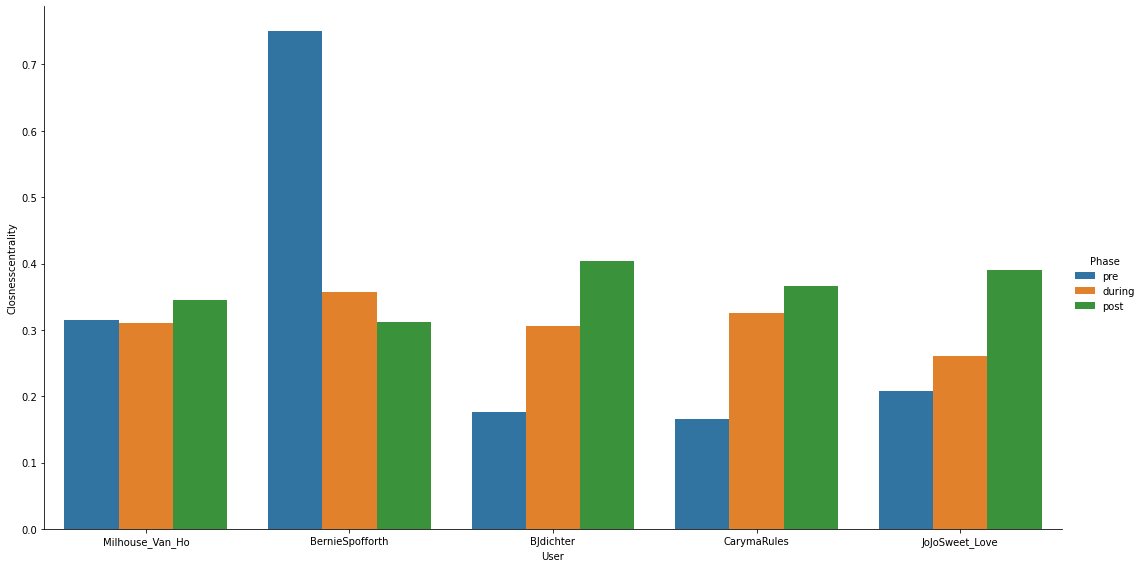

In [10]:
sns.catplot(data=closeness, x="User" ,y="Closnesscentrality", kind='bar',hue="Phase", height=8, aspect=15/8)
plt.show()

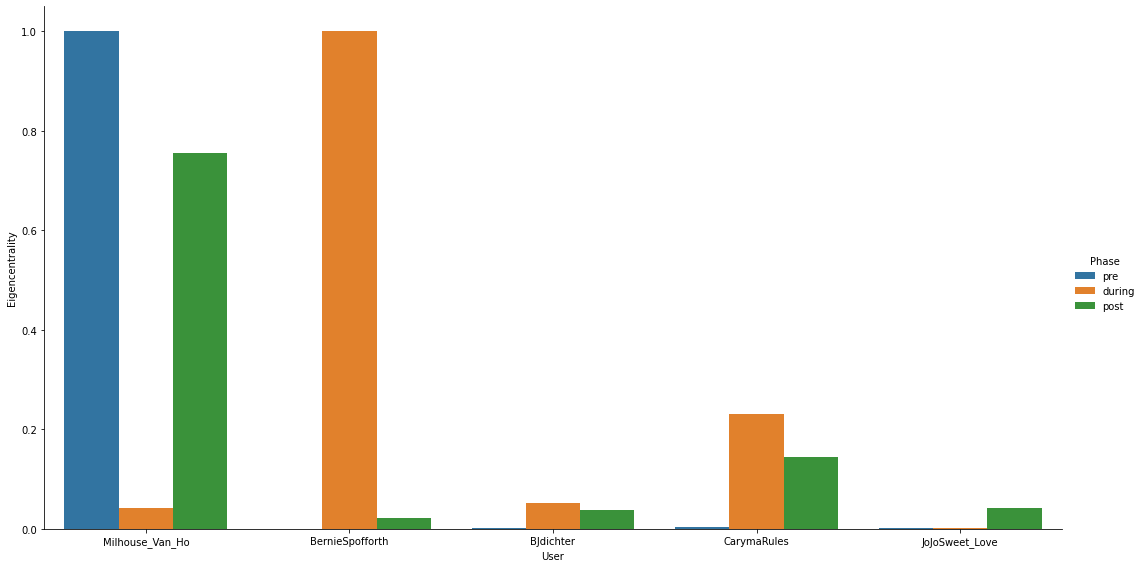

In [11]:
sns.catplot(data=closeness, x="User" ,y="Eigencentrality", kind='bar',hue="Phase", height=8, aspect=15/8)
plt.show()

# Collective Measures

In [12]:
group_measures = pd.read_csv("/content/drive/MyDrive/Social Network Analysis_Freedom Convoy/Final Query/Final_final query/Group Centrality Measures/Collective Measures.csv")
group_measures

,Phase,Group Closeness,Group Betweenness,Group Degree
0,pre,0.338307,11749604,908
1,during,0.414914,1416559948,16775
2,post,0.397295,486402804,20


In [13]:
group_measures.sort_values(by=['Phase'], inplace=True)

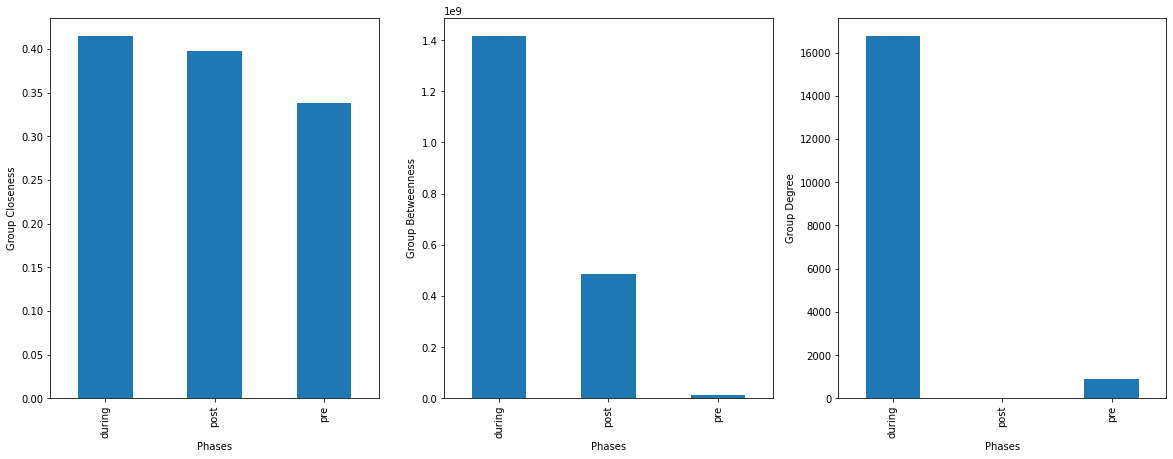

In [14]:
cols = ["Group Closeness", "Group Betweenness", "Group Degree"]

fig, ax = plt.subplots(ncols=3, figsize=(20,7), constrained_layout=False)

group_measures.groupby(['Phase']).mean()["Group Closeness"].T.plot(kind='bar', ax=ax[0], xlabel="Phases", ylabel="Group Closeness")
group_measures.groupby(['Phase']).mean()["Group Betweenness"].T.plot(kind='bar', ax=ax[1], xlabel="Phases", ylabel="Group Betweenness")
group_measures.groupby(['Phase']).mean()["Group Degree"].T.plot(kind='bar', ax=ax[2], xlabel="Phases", ylabel="Group Degree")

plt.show()

start with pre-during, post

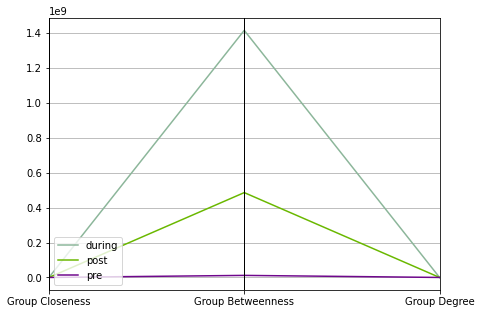

In [15]:
f, ax = plt.subplots(figsize=(7, 5))
pd.plotting.parallel_coordinates(group_measures, 'Phase', 
                                 cols=["Group Closeness", "Group Betweenness", "Group Degree"])
ax.legend(loc="lower left");

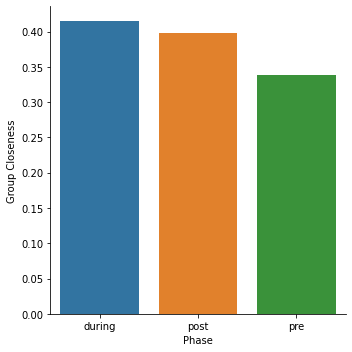

In [16]:
sns.catplot(data=group_measures, x="Phase", y="Group Closeness", kind='bar')
plt.show()

Text(0.5, 1.0, 'Group Closeness')

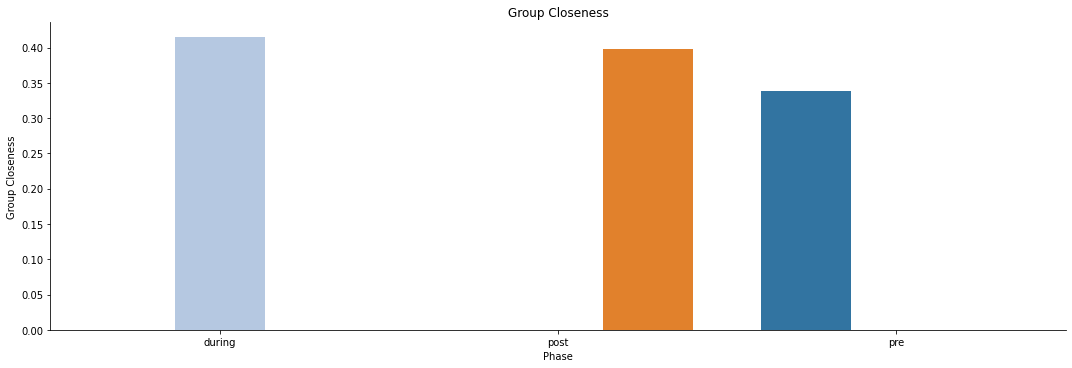

In [17]:


hue_order = ['pre', 'during', 'post']
sns.catplot(x="Phase", y="Group Closeness", hue="Phase", data=group_measures, kind="bar", hue_order=hue_order, palette='tab20', aspect=3, height=5)
plt.title("Group Closeness")


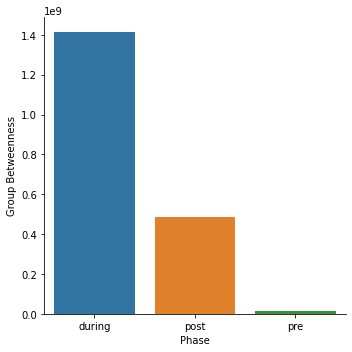

In [18]:
sns.catplot(data=group_measures, x="Phase", y="Group Betweenness", kind='bar')
plt.show()

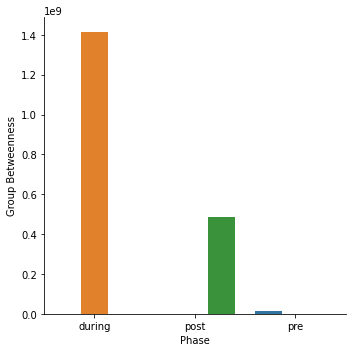

In [19]:
hue_order = ['pre', 'during', 'post']
sns.catplot(x="Phase", y="Group Betweenness", hue="Phase", data=group_measures, hue_order=hue_order, kind="bar")


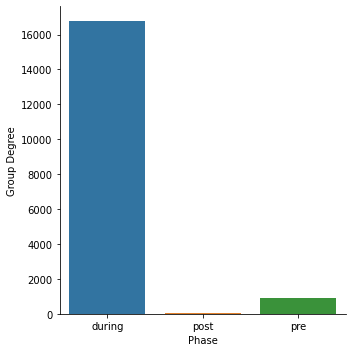

In [20]:
sns.catplot(data=group_measures, x="Phase", y="Group Degree", kind='bar')
plt.show()

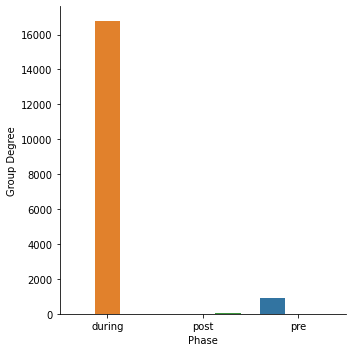

In [21]:
hue_order = ['pre', 'during', 'post']
sns.catplot(x="Phase", y="Group Degree", hue="Phase", data=group_measures, hue_order=hue_order, kind="bar")


# Collective Measures

In [22]:
group_measures = pd.read_csv("/content/drive/MyDrive/Social Network Analysis_Freedom Convoy/Final Query/Final_final query/Group Centrality Measures/Collective Measures.csv")
group_measures

,Phase,Group Closeness,Group Betweenness,Group Degree
0,pre,0.338307,11749604,908
1,during,0.414914,1416559948,16775
2,post,0.397295,486402804,20


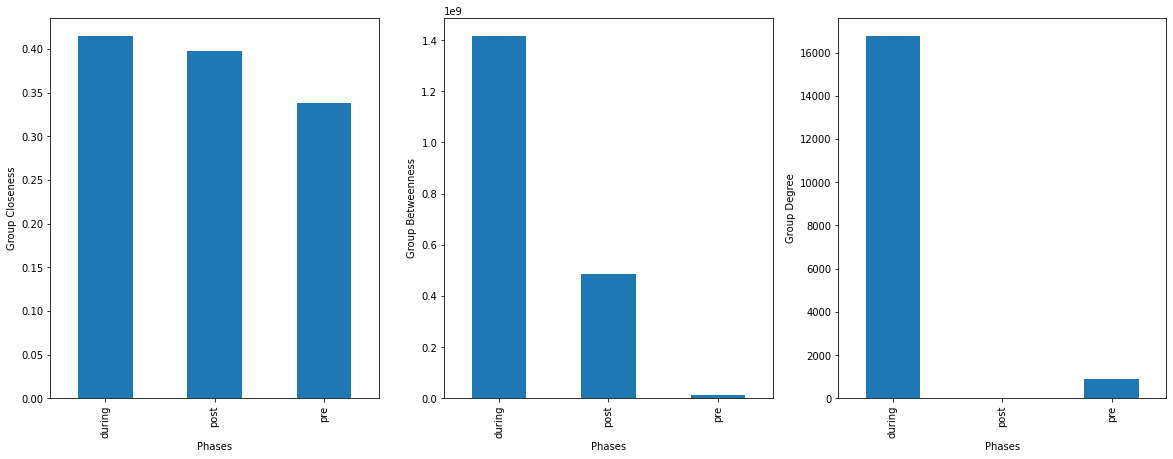

In [23]:
cols = ["Group Closeness", "Group Betweenness", "Group Degree"]

fig, ax = plt.subplots(ncols=3, figsize=(20,7), constrained_layout=False)

group_measures.groupby(['Phase']).mean()["Group Closeness"].T.plot(kind='bar', ax=ax[0], xlabel="Phases", ylabel="Group Closeness")
group_measures.groupby(['Phase']).mean()["Group Betweenness"].T.plot(kind='bar', ax=ax[1], xlabel="Phases", ylabel="Group Betweenness")
group_measures.groupby(['Phase']).mean()["Group Degree"].T.plot(kind='bar', ax=ax[2], xlabel="Phases", ylabel="Group Degree")

plt.show()

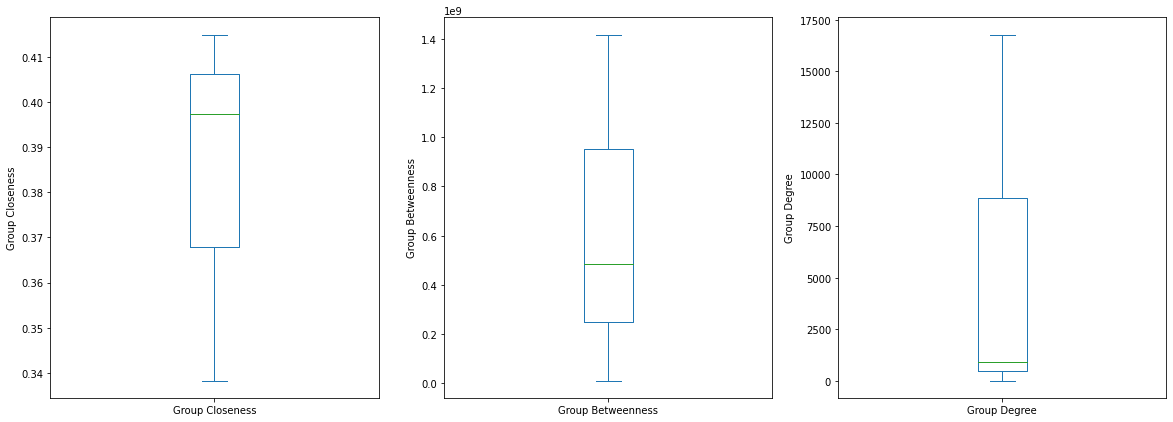

In [24]:
cols = ["Group Closeness", "Group Betweenness", "Group Degree"]

fig, ax = plt.subplots(ncols=3, figsize=(20,7), constrained_layout=False)

group_measures.groupby(['Phase']).mean()["Group Closeness"].T.plot(kind='box', ax=ax[0], xlabel="Phases", ylabel="Group Closeness")
group_measures.groupby(['Phase']).mean()["Group Betweenness"].T.plot(kind='box', ax=ax[1], xlabel="Phases", ylabel="Group Betweenness")
group_measures.groupby(['Phase']).mean()["Group Degree"].T.plot(kind='box', ax=ax[2], xlabel="Phases", ylabel="Group Degree")

plt.show()

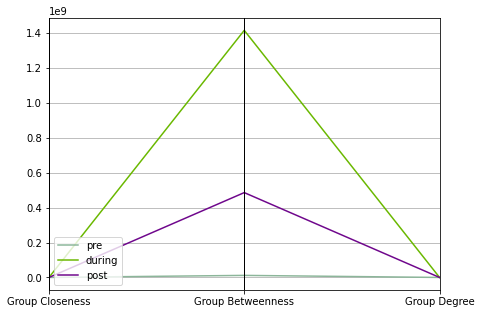

In [25]:
f, ax = plt.subplots(figsize=(7, 5))
pd.plotting.parallel_coordinates(group_measures, 'Phase', 
                                 cols=["Group Closeness", "Group Betweenness", "Group Degree"])
ax.legend(loc="lower left");

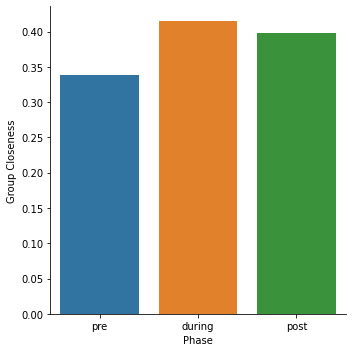

In [26]:
sns.catplot(data=group_measures, x="Phase", y="Group Closeness", kind='bar')
plt.show()


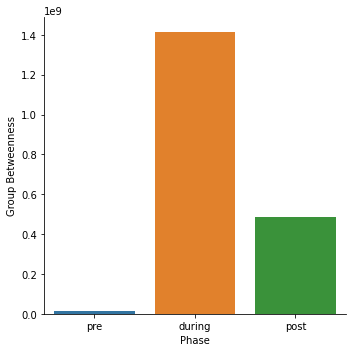

In [27]:
sns.catplot(data=group_measures, x="Phase", y="Group Betweenness", kind='bar')
plt.show()

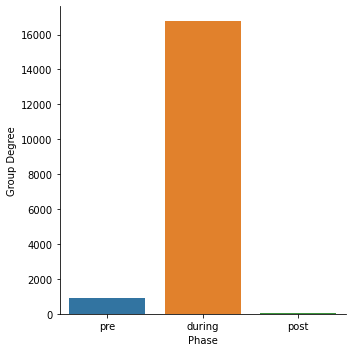

In [28]:
sns.catplot(data=group_measures, x="Phase", y="Group Degree", kind='bar')
plt.show()